In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:


# Specify the path to your CSV file
csv_file_path = '/content/drive/My Drive/articles.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)


In [3]:
df.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


In [4]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.4 MB/s eta 0:00:00


In [5]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 45.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 18.8 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (73

In [6]:
import numpy as np
import pandas as pd
import os
import re
import string
import warnings
import nltk
import spacy
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from tqdm import tqdm
from collections import Counter
from sklearn.metrics import silhouette_score
from bertopic import BERTopic

/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [7]:
# Ignore warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Load Medium articles data
medium_articles = pd.read_csv("/content/drive/My Drive/articles.csv")


In [9]:
# Preprocessing
medium_articles['text'] = medium_articles['text'].str.lower()
medium_articles['text'] = medium_articles['text'].apply(lambda x: re.sub(r'\s+', ' ', x))  # Remove extra whitespaces
medium_articles['text'] = medium_articles['text'].apply(lambda x: re.sub(r'<.*?>', '', x))  # Remove HTML tags

In [10]:
# Tokenization and Lemmatization
nlp = spacy.load("en_core_web_sm")
lemmatizer = WordNetLemmatizer()
medium_articles['text'] = medium_articles['text'].apply(lambda x: [token.lemma_ for token in nlp(x)])
medium_articles['text'] = medium_articles['text'].apply(lambda x: ' '.join(x))

In [11]:
# Initialize BERTopic
model = BERTopic()

In [12]:
# Fit BERTopic model
topics, _ = model.fit_transform(medium_articles['text'])

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Visualize the topics
model.visualize_topics()

In [13]:
# Select most 3 similar topics
similar_topics, similarity = model.find_topics("politics", top_n = 3)

In [14]:
#similarity score
print("Similarity Score: {}".format(similarity[0]))

Similarity Score: 0.1802530735731125


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [16]:
medium_articles = pd.read_csv("/content/drive/My Drive/articles.csv")
medium_articles.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


Total Number of unique authors : 182


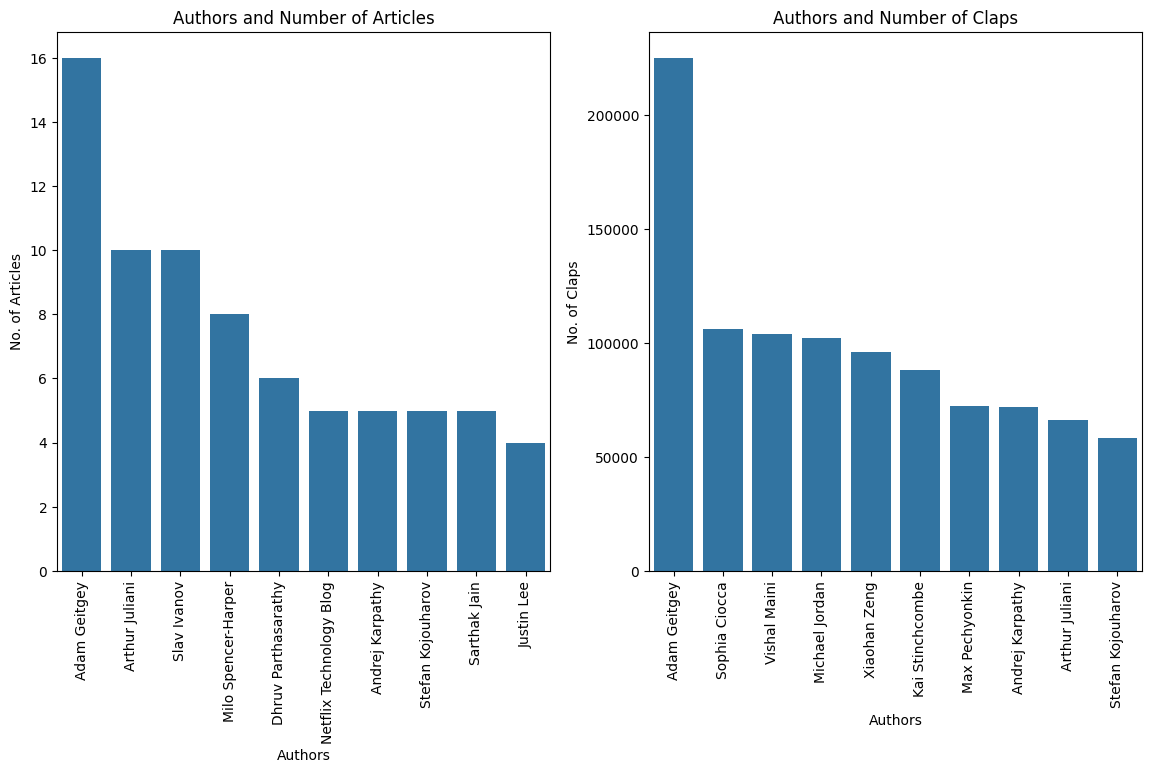

In [17]:
article_text = medium_articles.text
# visualise first article print few words from it
#print("First 1000 words in first article are : \n",article_text[0][:1000])

#total number of author
print(f"Total Number of unique authors : {len(medium_articles.author.unique())}")

#counting the articles of different authors
article_counts = dict()
for author in medium_articles.author:
    article_count = len(medium_articles[medium_articles["author"]==author])
    article_counts[author] = article_count

#sorting the article_counts on the basis of article count
article_counts = dict(sorted(article_counts.items(), key=lambda x: x[1], reverse=True))


#plot histogram of top 10 authors and their article counts
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
sns.barplot(x = list(article_counts.keys())[:10],y=list(article_counts.values())[:10])
plt.title("Authors and Number of Articles")
plt.xlabel("Authors")
plt.ylabel("No. of Articles")
plt.xticks(rotation = 90)



#counting the total number of claps for each author
def convert_to_num(clap_count):
    if "K" in clap_count:
        if "." in clap_count:
            clap_count = re.sub("\.","",clap_count[:-1])+"00"
        else:
            clap_count = clap_count[:-1]+"000"
    return(int(clap_count))

medium_articles.claps = medium_articles.claps.apply(convert_to_num)

#couting total number of claps for each author
clap_counts = dict()
for author in medium_articles.author:
    clap_count = medium_articles[medium_articles["author"]==author]["claps"]
    clap_counts[author] = sum(clap_count)

#sort clap_counts on the basis of counting of claps
clap_counts = dict(sorted(clap_counts.items(), key=lambda x: x[1], reverse=True))

#plot histogram of top 10 authors and their article counts
plt.subplot(1, 2, 2)
sns.barplot(x = list(clap_counts.keys())[:10],y=list(clap_counts.values())[:10])
plt.title("Authors and Number of Claps")
plt.xlabel("Authors")
plt.ylabel("No. of Claps")
plt.xticks(rotation = 90)
plt.show()

In [18]:
#lowercase the articles
medium_articles.text = medium_articles.text.apply(lambda t : t.lower())

In [19]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the text data
medium_articles.text = medium_articles.text.apply(lambda x:expand_contractions(x))

In [20]:
!pip install nltk

In [21]:
import nltk

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
print(f"These are the pucntions which string.punctuation consist :  {string.punctuation}")

These are the pucntions which string.punctuation consist :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [25]:
def remove_stopwords(text):
  """
  This function removes English stopwords from a given text.

  Args:
    text: A string containing the text to process.

  Returns:
    A string with stopwords removed.
  """

  stop_words = set(stopwords.words('english'))
  words = text.split()
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_words)

In [26]:

#removing stopwords
medium_articles.text = medium_articles.text.apply(remove_stopwords)

#removing Punctuations
medium_articles.text = medium_articles.text.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#removing digits
medium_articles.text = medium_articles.text.apply(lambda x: re.sub('\w*\d\w*','', x))

medium_articles.text[50]

'upd april   scikit flow merged tensorflow since version  called tensorflow learn tflearn google released machine learning framework called tensorflow it’s taking world storm  stars github lot publicity general excitement ai researchers now use something regular problem data scientist may have and ai researcher — build interesting problems time reasonable question data scientist already number tools toolbox r scikit learn etc care yet another framework answer two part let’s start simple example — take titanic dataset kaggle first make sure installed tensorflow scikit learn helpful libs including scikit flow simplifying lot work tensorflow get dataset code httpgithubcomilblackdragontfexamples quick look data use ipython ipython notebook ease interactive exploration let’s test predict survived class based float variables scikit learn separate dataset features target fill na data zeros build logistic regression predicting training data gives us measure accuracy of cause doesn’t properly e

In [27]:
def remove_extra_marks(text):
  """
  This function removes extra punctuation marks from a given text.

  Args:
    text: A string containing the text to process.

  Returns:
    A string with extra punctuation marks removed.
  """

  # Define a set of extra punctuation marks to remove
  extra_marks = set(string.punctuation)

  # Remove extra punctuation marks from the text
  cleaned_text = ''.join([char for char in text if char not in extra_marks])

  return cleaned_text

In [28]:

medium_articles.text = medium_articles.text.apply(remove_extra_marks)

In [29]:
#printing arbitrary example to visulise clean data
medium_articles.text[50]

'upd april   scikit flow merged tensorflow since version  called tensorflow learn tflearn google released machine learning framework called tensorflow it’s taking world storm  stars github lot publicity general excitement ai researchers now use something regular problem data scientist may have and ai researcher — build interesting problems time reasonable question data scientist already number tools toolbox r scikit learn etc care yet another framework answer two part let’s start simple example — take titanic dataset kaggle first make sure installed tensorflow scikit learn helpful libs including scikit flow simplifying lot work tensorflow get dataset code httpgithubcomilblackdragontfexamples quick look data use ipython ipython notebook ease interactive exploration let’s test predict survived class based float variables scikit learn separate dataset features target fill na data zeros build logistic regression predicting training data gives us measure accuracy of cause doesn’t properly e

In [30]:
import spacy
nlp = spacy.load('en_core_web_sm')
print(f""" "helps" after lemmztization :  {nlp("helps")[0].lemma_}""")
print(f""" "helping" after lemmztization :  {nlp("helping")[0].lemma_}""")

 "helps" after lemmztization :  help
 "helping" after lemmztization :  help


In [31]:
def lemmatize(text):
    """Return text after performing the lemmztiztion"""
    doc = nlp(text)
    tokens = [token for token in doc]
    return  " ".join([token.lemma_ for token in doc])

#lemmatize the articles
medium_articles.text = medium_articles.text.apply(lemmatize)

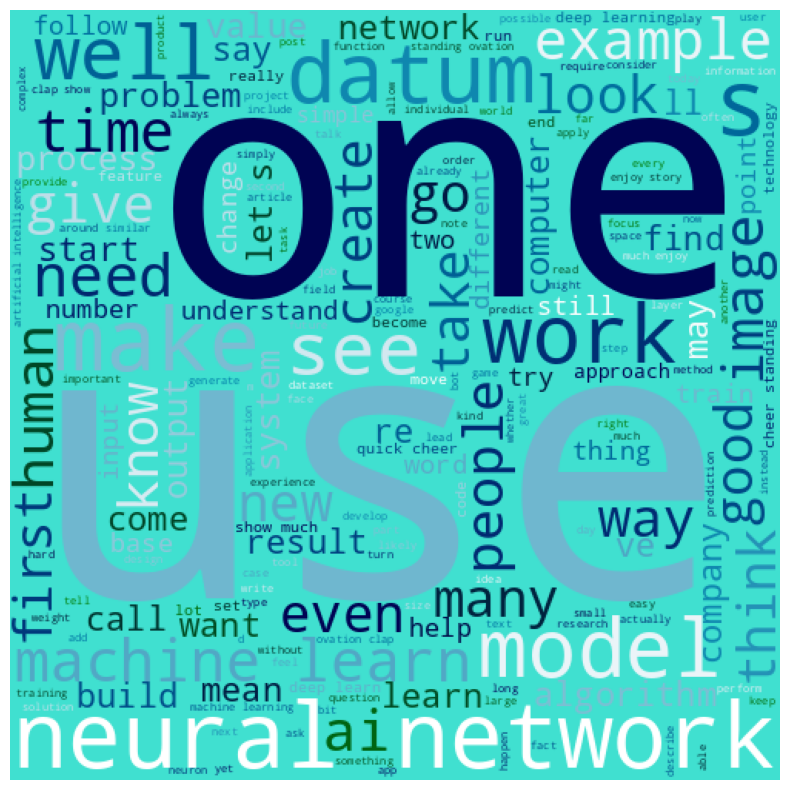

In [32]:
import wordcloud
from wordcloud import WordCloud

#combine all the articles
article_data = ""
for article in medium_articles.text:
    article_data = article_data+" "+article

#ploting the word cloud
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width = 500, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(article_data)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [33]:
#tokenize articles
tokeize_article = medium_articles.text.apply(lambda x : x.split())
id2word = corpora.Dictionary(tokeize_article)

# Create Corpus
texts = tokeize_article

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


#printing 50 words from the text corpus
corpus_example = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]
corpus_example[0][:50]

[('"', 4),
 ("'", 15),
 ('able', 1),
 ('about', 1),
 ('abruptly', 1),
 ('acceptance', 1),
 ('access', 1),
 ('accident', 1),
 ('accord', 2),
 ('achieve', 2),
 ('adage', 1),
 ('advantage', 1),
 ('agenda', 1),
 ('ageold', 1),
 ('ago', 2),
 ('ai', 3),
 ('aim', 1),
 ('alive', 1),
 ('allow', 1),
 ('allrounder', 1),
 ('along', 1),
 ('also', 1),
 ('alternative', 1),
 ('amount', 1),
 ('analyze', 1),
 ('another', 5),
 ('answer', 1),
 ('anticipate', 1),
 ('anticlimax', 1),
 ('anyone', 1),
 ('anything', 2),
 ('app', 12),
 ('apply', 1),
 ('approach', 3),
 ('arcane', 2),
 ('area', 2),
 ('arise', 1),
 ('around', 3),
 ('asay', 1),
 ('ask', 1),
 ('aspect', 1),
 ('assumption', 1),
 ('attention', 1),
 ('automate', 1),
 ('automated', 1),
 ('available', 1),
 ('average', 1),
 ('away', 2),
 ('back', 3),
 ('baffle', 1)]

In [34]:
# build LDA model for 10 topic
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           per_word_topics=True,
                                           eta = 0.6)

In [35]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.021*"de" + 0.010*"course" + 0.009*"la" + 0.009*"machine" + 0.007*"en" + '
  '0.007*"learn" + 0.007*"que" + 0.005*"review" + 0.005*"para" + '
  '0.004*"rating"'),
 (1,
  '0.013*""" + 0.007*"—" + 0.006*"human" + 0.006*"ai" + 0.006*"’s" + '
  '0.005*"machine" + 0.005*"use" + 0.005*"it" + 0.005*"not" + 0.004*"’"'),
 (2,
  '0.012*"action" + 0.009*"game" + 0.008*"network" + 0.008*"move" + '
  '0.007*"policy" + 0.007*"state" + 0.006*"learn" + 0.006*"agent" + '
  '0.005*"give" + 0.005*"reward"'),
 (3,
  '0.011*"function" + 0.009*"use" + 0.007*"weight" + 0.007*""" + '
  '0.007*"activation" + 0.007*"layer" + 0.007*"gradient" + 0.006*"network" + '
  '0.005*"neuron" + 0.005*"get"'),
 (4,
  '0.015*""" + 0.013*"network" + 0.011*"use" + 0.010*"neural" + 0.010*"’s" + '
  '0.009*"learn" + 0.008*"one" + 0.007*"model" + 0.007*"not" + 0.006*"image"'),
 (5,
  '0.019*""" + 0.006*"man" + 0.006*"woman" + 0.005*"attract" + '
  '0.004*"analytica" + 0.004*"face" + 0.004*"facial" + 0.004*"trump" + '
  '

In [36]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.277158  0.002767       1        1  46.784163
1     -0.152979 -0.082630       2        1  30.933826
3     -0.151967  0.110067       3        1   8.103408
2     -0.051434 -0.033444       4        1   5.204913
0      0.110455  0.086213       5        1   3.264260
5      0.063659 -0.061173       6        1   2.516448
7      0.111042 -0.011221       7        1   1.445971
6      0.100148 -0.002918       8        1   0.968708
9      0.125510 -0.006227       9        1   0.481096
8      0.122724 -0.001434      10        1   0.297208, topic_info=           Term         Freq        Total Category  logprob  loglift
0             "  4403.000000  4403.000000  Default  30.0000  30.0000
1471      image  1173.000000  1173.000000  Default  29.0000  29.0000
1075    network  2685.000000  2685.000000  Default  28.0000  28.0000
345       learn  2100.000000  2100.000000  Default  27.0000  27.0000
370     machine  1346.000000  1346.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
15595  инженеры     0.331321     3.442079  Topic10  -8.0930   3.4778
15609        их     0.331321     3.442079  Topic10  -8.0930   3.4778
15610         к     0.331321     3.442079  Topic10  -8.0930   3.4778
265      google     0.395307   410.996713  Topic10  -7.9164  -1.1282
0             "     0.391136  4403.894293  Topic10  -7.9270  -3.5105

[597 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.564046    "
0         2  0.337883    "
0         3  0.048139    "
0         4  0.007720    "
0         5  0.002271    "
...     ...       ...  ...
696       6  0.007878   ’s
697       1  0.021987    →
697       2  0.087946    →
697       3  0.835491    →
697       7  0.021987    →

[1825 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 3, 1, 6, 8, 7, 10, 9])

In [37]:
# Compute Perplexity
print('\nPerplexity : ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity :  -7.72978902567547

Coherence Score:  0.5111941464392754


In [38]:
def calculate_coherence_score(n, alpha, beta):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           per_word_topics=True,
                                           eta = beta)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda

#list containing various hyperparameters
no_of_topics = [2,5,7,10,12,14]
alpha_list = ['symmetric',0.3,0.5,0.7]
beta_list = ['auto',0.3,0.5,0.7]


for n in no_of_topics:
    for alpha in alpha_list:
        for beta in beta_list:
            coherence_score = calculate_coherence_score(n, alpha, beta)
            print(f"n : {n} ; alpha : {alpha} ; beta : {beta} ; Score : {coherence_score}")

n : 2 ; alpha : symmetric ; beta : auto ; Score : 0.31078962788412456
n : 2 ; alpha : symmetric ; beta : 0.3 ; Score : 0.29709354480301764
n : 2 ; alpha : symmetric ; beta : 0.5 ; Score : 0.31078962788412456
n : 2 ; alpha : symmetric ; beta : 0.7 ; Score : 0.3363128462017453


n : 2 ; alpha : 0.3 ; beta : auto ; Score : 0.31078962788412456
n : 2 ; alpha : 0.3 ; beta : 0.3 ; Score : 0.2970935448030177
n : 2 ; alpha : 0.3 ; beta : 0.5 ; Score : 0.31078962788412456
n : 2 ; alpha : 0.3 ; beta : 0.7 ; Score : 0.32226109023059346


n : 2 ; alpha : 0.5 ; beta : auto ; Score : 0.31078962788412456
n : 2 ; alpha : 0.5 ; beta : 0.3 ; Score : 0.29709354480301764
n : 2 ; alpha : 0.5 ; beta : 0.5 ; Score : 0.31078962788412456


n : 2 ; alpha : 0.5 ; beta : 0.7 ; Score : 0.3363128462017453


n : 2 ; alpha : 0.7 ; beta : auto ; Score : 0.31078962788412456
n : 2 ; alpha : 0.7 ; beta : 0.3 ; Score : 0.2970935448030177
n : 2 ; alpha : 0.7 ; beta : 0.5 ; Score : 0.31078962788412456
n : 2 ; alpha : 0.7 ; beta : 0.7 ; Score : 0.3107202649107049
n : 5 ; alpha : symmetric ; beta : auto ; Score : 0.3224483587025416
n : 5 ; alpha : symmetric ; beta : 0.3 ; Score : 0.32340272127441283
n : 5 ; alpha : symmetric ; beta : 0.5 ; Score : 0.3241287239017897
n : 5 ; alpha : symmetric ; beta : 0.7 ; Score : 0.33864017286689957
n : 5 ; alpha : 0.3 ; beta : auto ; Score : 0.3224483587025416
n : 5 ; alpha : 0.3 ; beta : 0.3 ; Score : 0.32296661974406965
n : 5 ; alpha : 0.3 ; beta : 0.5 ; Score : 0.3241287239017897
n : 5 ; alpha : 0.3 ; beta : 0.7 ; Score : 0.33787985860841346
n : 5 ; alpha : 0.5 ; beta : auto ; Score : 0.3224483587025416
n : 5 ; alpha : 0.5 ; beta : 0.3 ; Score : 0.32623642249770335
n : 5 ; alpha : 0.5 ; beta : 0.5 ; Score : 0.3241287239017897
n : 5 ; alpha : 0.5 ; beta : 0.7 ; 

In [39]:
n = 14
alpha = 0.5
beta = 0.5
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           per_word_topics=True,
                                           eta = beta)
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5312810533347684


In [40]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.337953  0.008473       1        1  47.279404
1     -0.228564  0.007161       2        1  34.762162
12    -0.015195 -0.014819       3        1   2.927693
0      0.037489  0.167721       4        1   2.914798
2     -0.058698 -0.067569       5        1   2.687325
7      0.037705 -0.008882       6        1   2.398825
11     0.058529 -0.036441       7        1   1.822149
10     0.080918 -0.017596       8        1   1.387486
6      0.036687 -0.020223       9        1   1.284988
3      0.040644 -0.001319      10        1   1.041023
5      0.095363  0.012089      11        1   0.720547
9      0.087063 -0.015205      12        1   0.482460
8      0.086278 -0.008097      13        1   0.242813
13     0.079734 -0.005294      14        1   0.048329, topic_info=            Term         Freq        Total Category  logprob  loglift
0              "  4451.000000  4451.000000  Default  30.0000  30.0000
1075     network  2727.000000  2727.000000  Default  29.0000  29.0000
345        learn  2132.000000  2132.000000  Default  28.0000  28.0000
1471       image  1151.000000  1151.000000  Default  27.0000  27.0000
370      machine  1343.000000  1343.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
10786      drill     0.010400     5.065810  Topic14  -9.7379   1.4464
12401        sam     0.010399     4.713439  Topic14  -9.7380   1.5184
3759       lasso     0.010398     5.442932  Topic14  -9.7381   1.3744
11208  covariate     0.010398     4.241364  Topic14  -9.7381   1.6238
14390     latest     0.010398     4.910292  Topic14  -9.7381   1.4774

[831 rows x 6 columns], token_table=      Topic      Freq                                               Term
term                                                                    
0         1  0.524519                                                  "
0         2  0.395355                                                  "
0         3  0.074578                                                  "
0         4  0.003145                                                  "
0         5  0.000674                                                  "
...     ...       ...                                                ...
4350      2  0.302038  发现作为工程师来说还是看代码比较有感觉看实际应用的实例比较有感觉看来不能把大部分时间花在pr...
4351      2  0.302038  基本上这样一圈下来基本概念和算法实现都应该搞定了当然数学证明其实没那么容易就搞定但是对于工程...
4352      2  0.302038                                   生命如此短暂掌握技艺却要如此长久
4353      2  0.302038  这一阵为了工作上的关系花了点时间学习了一下lda算法说实话对于我这个学cs而非学数学的人来说...
4354      2  0.302038  这样前前后后也过去了三个月其实不少时间都是浪费掉的比如blei的论文在没有任何相关知识的情况...

[2146 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 13, 1, 3, 8, 12, 11, 7, 4, 6, 10, 9, 14])